In [ ]:
import numpy as np

X = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
], dtype=np.float32)

y = np.array([[0],[1],[1],[0]], dtype=np.float32)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Keras Predictions:
 [[0.]
 [1.]
 [1.]
 [0.]]
Keras Accuracy: 1.0


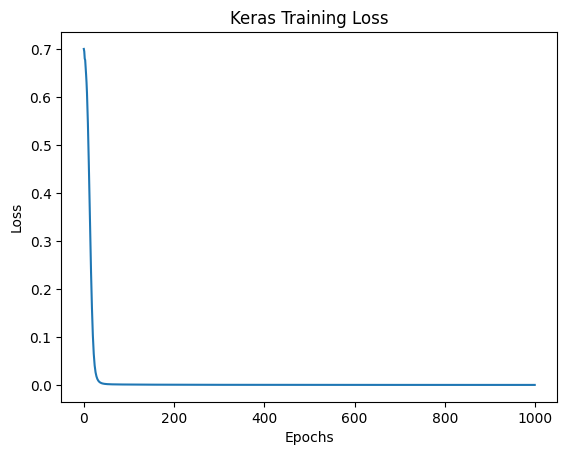

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Model
model_keras = tf.keras.Sequential([
    tf.keras.layers.Dense(8, input_dim=2, activation='tanh'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile
model_keras.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train
history_keras = model_keras.fit(X, y, epochs=1000, verbose=0)

# Evaluate
pred_keras = np.round(model_keras.predict(X))
acc_keras = np.mean(pred_keras == y)

print("Keras Predictions:\n", pred_keras)
print("Keras Accuracy:", acc_keras)

# Training Curve
plt.plot(history_keras.history['loss'])
plt.title("Keras Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


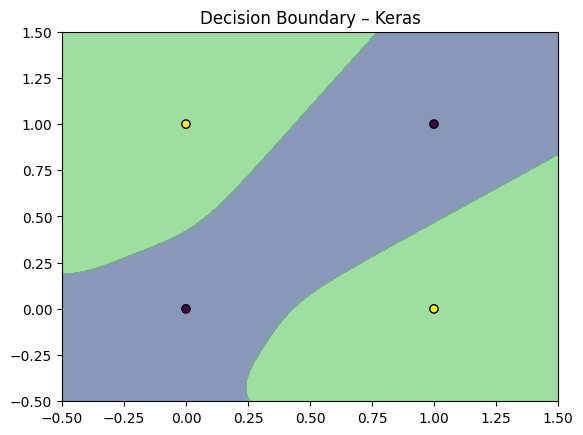

In [ ]:
xx, yy = np.meshgrid(np.linspace(-0.5,1.5,200), np.linspace(-0.5,1.5,200))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = model_keras.predict(grid).reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=[0,0.5,1], alpha=0.6)
plt.scatter(X[:,0], X[:,1], c=y[:,0], edgecolors='k')
plt.title("Decision Boundary – Keras")
plt.show()

PyTorch Predictions:
 tensor([[0.],
        [1.],
        [1.],
        [0.]])
PyTorch Accuracy: 1.0


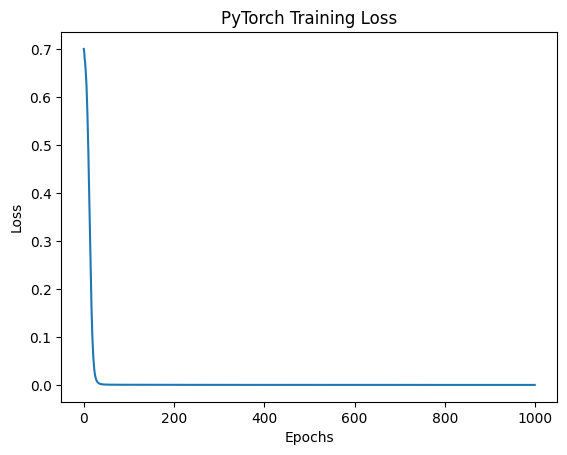

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

X_t = torch.tensor(X)
y_t = torch.tensor(y)

class XORNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2, 8)
        self.fc2 = nn.Linear(8, 1)

    def forward(self, x):
        x = torch.tanh(self.fc1(x))
        return torch.sigmoid(self.fc2(x))

model_torch = XORNet()

criterion = nn.BCELoss()
optimizer = optim.Adam(model_torch.parameters(), lr=0.1)

losses_torch = []

for epoch in range(1000):
    optimizer.zero_grad()
    out = model_torch(X_t)
    loss = criterion(out, y_t)
    loss.backward()
    optimizer.step()
    losses_torch.append(loss.item())

with torch.no_grad():
    preds_torch = torch.round(model_torch(X_t))
    acc_torch = torch.mean((preds_torch == y_t).float())

print("PyTorch Predictions:\n", preds_torch)
print("PyTorch Accuracy:", acc_torch.item())

# Training Curve
plt.plot(losses_torch)
plt.title("PyTorch Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()


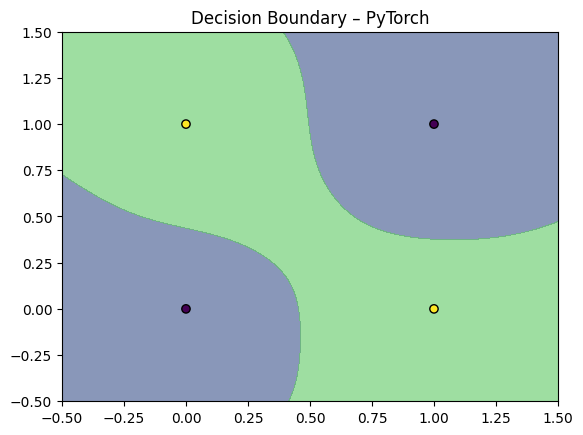

In [ ]:
grid_t = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)

with torch.no_grad():
    Z = model_torch(grid_t).reshape(xx.shape)

plt.contourf(xx, yy, Z.numpy(), levels=[0,0.5,1], alpha=0.6)
plt.scatter(X[:,0], X[:,1], c=y[:,0], edgecolors='k')
plt.title("Decision Boundary – PyTorch")
plt.show()


TF Low-Level Predictions:
 [[0.]
 [1.]
 [1.]
 [0.]]
TF Low-Level Accuracy: 1.0


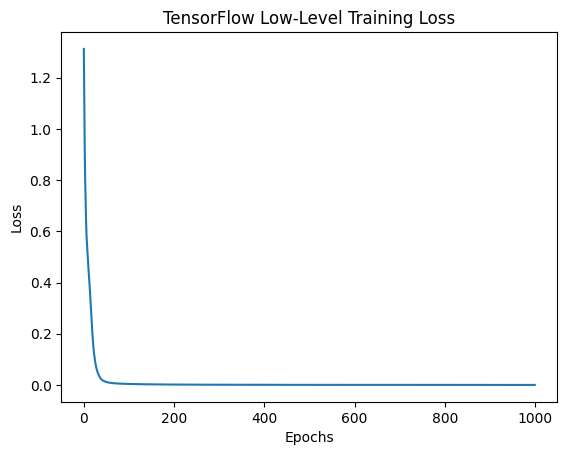

In [ ]:
import tensorflow as tf

X_tf = tf.constant(X)
y_tf = tf.constant(y)

W1 = tf.Variable(tf.random.normal([2,8]))
b1 = tf.Variable(tf.zeros([8]))
W2 = tf.Variable(tf.random.normal([8,1]))
b2 = tf.Variable(tf.zeros([1]))

def model_tf(x):
    h = tf.nn.tanh(tf.matmul(x, W1) + b1)
    return tf.nn.sigmoid(tf.matmul(h, W2) + b2)

losses_tf = []
optimizer = tf.optimizers.Adam(learning_rate=0.1)

for epoch in range(1000):
    with tf.GradientTape() as tape:
        y_pred = model_tf(X_tf)
        loss = tf.reduce_mean(
            tf.keras.losses.binary_crossentropy(y_tf, y_pred)
        )
    grads = tape.gradient(loss, [W1,b1,W2,b2])
    optimizer.apply_gradients(zip(grads, [W1,b1,W2,b2]))
    losses_tf.append(loss.numpy())

pred_tf = tf.round(model_tf(X_tf))
acc_tf = tf.reduce_mean(tf.cast(pred_tf == y_tf, tf.float32))

print("TF Low-Level Predictions:\n", pred_tf.numpy())
print("TF Low-Level Accuracy:", acc_tf.numpy())

plt.plot(losses_tf)
plt.title("TensorFlow Low-Level Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()


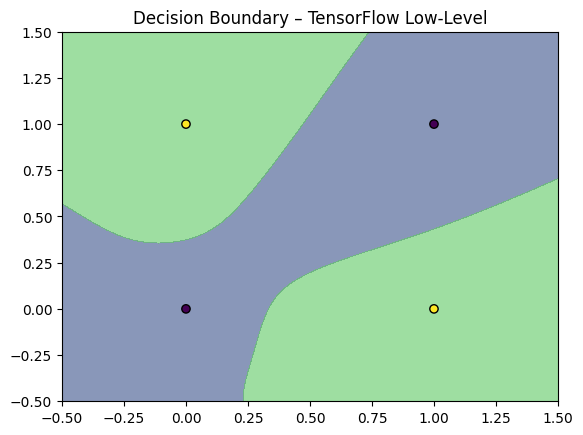

In [ ]:
grid_tf = tf.constant(np.c_[xx.ravel(), yy.ravel()], dtype=tf.float32)
Z = tf.reshape(model_tf(grid_tf), xx.shape)

plt.contourf(xx, yy, Z, levels=[0,0.5,1], alpha=0.6)
plt.scatter(X[:,0], X[:,1], c=y[:,0], edgecolors='k')
plt.title("Decision Boundary – TensorFlow Low-Level")
plt.show()


The decision boundary plots show how the MLP separates the XOR input space into two output classes (0 and 1). In the XOR problem, the data points cannot be separated using a single straight line, which means the problem is non-linearly separable.

*   From the plots, we can clearly observe that the trained MLP forms a non-linear decision boundary that correctly classifies all four XOR input combinations.

*   The regions where the output is close to 1 are diagonally opposite to each
other, while the regions producing output 0 lie in the remaining diagonal positions.

*  This shape of the boundary confirms that the hidden layer with a non-linear activation function (Tanh) allows the network to learn complex patterns.


*   Each hidden neuron contributes to creating intermediate linear separations, together form a curved boundary. This is something a single-layer perceptron cannot achieve.

The decision boundaries obtained using Keras, PyTorch, and TensorFlow low-level APIs are slightly different in shape, but all of them correctly separate the classes, showing consistent learning across libraries.


